NETFLIX

Za temu seminarskog rada smo uzele podatke najpopularnije aplikacije za gledanje filmova i serija, Netflix. Podatke smo našle na stranici kaggle (https://www.kaggle.com/shivamb/netflix-shows). Njih ćemo koristiti za vizualni prikaz rasta filmova i serija kroz godine, koje zemlje proizvode najviše serija i filmova, te još druge zanimljive vizualizacije.

Prvo što ćemo napraviti jest učitavanje podataka s kojima radimo, te provedba EDA, odnosno exploratory data analysis. Exploratory Data Analysis je analiza podataka koja za svrhu ima pronalažanje uzoraka koji se ponavljaju kroz podatke, za otkrivanje anomalija, čišćenje vrijednosti koje nedostaju, prikaz osnovnih informacija o podacima, itd.

Radimo import biblioteka koje ćemo koristiti, te ćemo u varijablu data učitati datoteku 'netflix_titles.csv'. Za matplotlib izgled grafova ćemo izabrati seaborn. Na kraju ćemo ispisati najosnovnije informacije o podacima.

In [297]:
##import biblioteka koje ćemo koristiti
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import seaborn as sea
import plotly.express as ex
from scipy.stats import mannwhitneyu as mn
from scipy.stats import  ttest_1samp,  ttest_ind as test,normaltest as normal


##stavljamo stil plota na onaj koji želimo, to može biti seaborn, classic, default
plt.style.use('seaborn')

##ucitajmo tablicu s podacima
data=pd.read_csv("netflix_titles.csv")

##pogledajmo malo detalje o podacima
print('OPČENITI INFO O PODACIMA: \n')
print(data.info(),'\n')
print('UKUPAN BROJ PODATAKA: \n', data.count(),"\n \n TIP PODATAKA:\n",data.dtypes,'\n')
print('NAZIVI STUPACA: \n',data.columns,'\n')
print('retci/stupci: \n',data.shape,'\n')

OPČENITI INFO O PODACIMA: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None 

UKUPAN BROJ PODATAKA: 
 show_id         7787
type            7787
title           7787
director        5398
cast            7069
country         7280
date_added      7777
release_year    7787
rating          7780
dura

In [298]:
##izgled tablice podataka
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


Sada kada smo obavili učitavanje podataka, krećemo u njihovo čiščenje kako bismo ih pripremili za daljni rad, odnosno za lakše stvaranje grafova.

In [299]:
##Prvo gledamo koliko ima podataka kojima fali vrijednost.
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Kako možemo vidjeti najviše podataka fali u stupcima redatelji, postava i zemlje i stoga ćemo morati nešto napraviti da bismo mogli lakše s njima raditi, a da ne izgubimo ostale podatke. Dok kod datuma izlaska i ratinga ima jako malo podataka pa ćemo njih lako izmjeniti.

In [300]:
##S obzirom da neki nemaju podatke za redatelja i postavu, njih ćemo staviti kao unknown 
data['director'] = data['director'].fillna('unknown')
data['cast'] = data['cast'].fillna('unknown')
data.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

In [301]:
## za datum dodavanja smo stavile proizvoljan datum
data['date_added'] = data['date_added'].fillna('December 15,2020')
data.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         507
date_added        0
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

In [302]:
##sada idemo vidjeti koji filmovi nemaju recenziju da bi smo se lakše odlučili koju ćemo staviti za njih s obzirom da se radi
##samo o 7 podataka to nam je lako za napraviti
x=data[data['rating'].isna()]
x

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,unknown,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,unknown,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,unknown,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [303]:
##nekako ispraviti zasada nek stoji ovako
for i in range(len(data)):
    if data['type'][i]=='Movie' and data['rating'][i] is np.nan:
        data.loc[i, 'rating'] =  "PG-13"
    if data['type'][i] =='TV Show' and data['rating'][i] is np.nan:
        data.loc[i, 'rating'] = 'TV-14'
        
data.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         507
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [304]:
##Gledamo koji to filmovi nemaju naznačenu zemlju izrade.
x=data[data['country'].isna()]
x

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
16,s17,TV Show,Feb-09,unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
38,s39,TV Show,แผนร้ายนายเจ้าเล่ห์,unknown,"Chutavuth Pattarakampol, Sheranut Yusananda, N...",NaN,"March 30, 2019",2016,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","When two brothers fall for two sisters, they q..."
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,unknown,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,PG-13,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
117,s118,Movie,5 Cowok Jagoan,Anggy Umbara,"Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...",NaN,"January 5, 2019",2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...
...,...,...,...,...,...,...,...,...,...,...,...,...
7739,s7740,Movie,Your Excellency,Funke Akindele,"Akin Lewis, Funke Akindele, Kemi Lala Akindoju...",NaN,"July 10, 2020",2019,TV-G,120 min,"Comedies, International Movies","Bumbling through politics, a billionaire busin..."
7746,s7747,TV Show,دفعة القاهرة,unknown,"Bashar al-Shatti, Fatima Al Safi, Maram Baloch...",NaN,"April 25, 2020",2019,TV-14,1 Season,"International TV Shows, TV Dramas",A group of women leaves Kuwait to attend unive...
7765,s7766,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",NaN,"December 13, 2019",2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ..."
7777,s7778,TV Show,Zombie Dumb,unknown,unknown,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."


In [305]:
##S obzirom da veliki broj filmova/serija nema naznačenu zemlju, njih čak 507, odlučili smo se voditi informacijama spremljenima
##u listed_in. Odnosno, ako u listed_in piše International, voditi ćemo se time da je potječe iz inozemstva, a za ostale ćemo 
##staviti Ameriku za zemlju s obzirom da oni dosta filmova/serija produciraju.
##nekako ispraviti zasada nek stoji ovako
for i in range(len(data)):
    if data['country'][i] is np.nan:
        if "International" in data['listed_in'][i]:
            data.loc[i, 'country']= "International"
        else:
             data.loc[i, 'country']= "United States"
            
        
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Sada kada smo rješili problem nedostajućih podataka, možemo ići na sljedeći korak, a to je vizualizacija podataka pomoću različitih grafova za čije smo crtanje koristili biblioteke matplotlib, plotly i seaborn.

PRVI GRAF PIE CHART MOVIE/TV SHOWS

Za početak ćemo prvo vidjeti koliko u tablici imamo filmova, a koliko serija, te napraviti grafički prikaz kako bi mogli vizualno vidjeti čega ima više. Za to ćemo koristiti pie chart koji ćemo raditi pomoću biblioteke matplotlib. Prvo ćemo u varijablu podaci spremiti one podatke koji nas najviše zanimaju da bi smo olakšali izradu grafa. Nakon toga inicijaliziramo figuru i os za crtanje grafa, te ga pomoću ax.pie() crtamo. U ax.pie() šaljemo podatke, te vrijednosti labela.


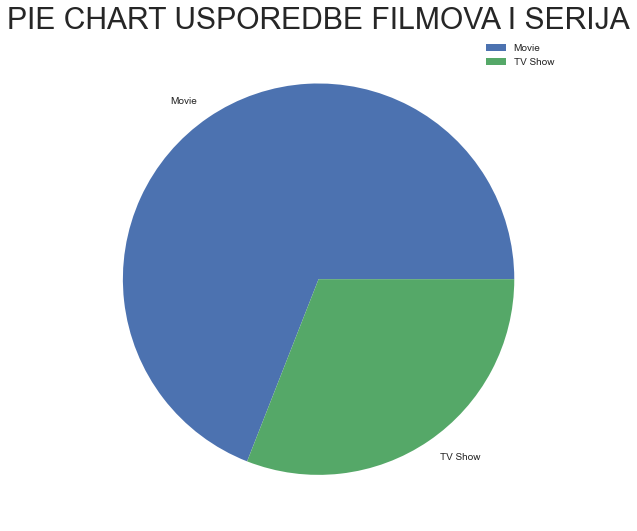

In [306]:
##U varijablu podaci spremamo one podatke koji su nam potrebni za graf
podaci=data['type'].value_counts()
##U labele_grafa spremamo nazive podataka koje uspoređujemo u grafu
labele_grafa=data['type'].value_counts().index

##Prvi korak jest sama inicijalizacija figure i osi grafa
##Figsize koristimo kako bi malo uvečali graf da ne bude presitan radi lakšeg gledanja
fig, ax = plt.subplots(figsize = (9,9))
##pozivamo ax.pie i crtamo graf
ax.pie(podaci, labels=labele_grafa) 

##dajemo naziv grafu tako da ga najbolje opisuje
plt.title('PIE CHART USPOREDBE FILMOVA I SERIJA', size=30)
##Kreiramo malu legendu koja boja ide uz koji tip podatka
ax.legend(labele_grafa)
m=data[data['type']=='Movie']
s=data[data['type']=='TV Show']

OPIS GRAFA

Iz grafa je vidljivo da se više od pola podataka čine filmovi, dok serije čine manji dio. Što znači da filmova ima dosta više.


DRUGI GRAF

Za drugi graf smo izabrale stupičasti graf kojim želimo prikazati top n godina kada je izašlo najviše filmova i serija. Prvo ćemo prikazati ukupan broj filmova i serija kroz n godina, u ovom slučaju smo se odlučili za zadnjih 5 godina. A onda ćemo prikazati i odvojen broj za serije i filmove kroz godine kako bismo mogli i njih međusobno usporediti, tu ćemo za n uzeti 10 godina.

In [307]:
##gledat ćemo broj serija/filmovakoji su izasli po godinama
##I onda cemo prvih TOP5 godina prikazati grafom
godina_izlaska = data.groupby('release_year').count().reset_index()

##sortiranje
godina_izlaska=godina_izlaska.sort_values('show_id',ascending=False)

godina_izlaska

,release_year,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
69,2018,1121,1121,1121,1121,1121,1121,1121,1121,1121,1121,1121
68,2017,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012
70,2019,996,996,996,996,996,996,996,996,996,996,996
67,2016,882,882,882,882,882,882,882,882,882,882,882
71,2020,868,868,868,868,868,868,868,868,868,868,868
...,...,...,...,...,...,...,...,...,...,...,...,...
17,1966,1,1,1,1,1,1,1,1,1,1,1
6,1947,1,1,1,1,1,1,1,1,1,1,1
11,1959,1,1,1,1,1,1,1,1,1,1,1
15,1964,1,1,1,1,1,1,1,1,1,1,1


[Text(0, 0, '2018'),
 Text(1, 0, '2017'),
 Text(2, 0, '2019'),
 Text(3, 0, '2016'),
 Text(4, 0, '2020')]

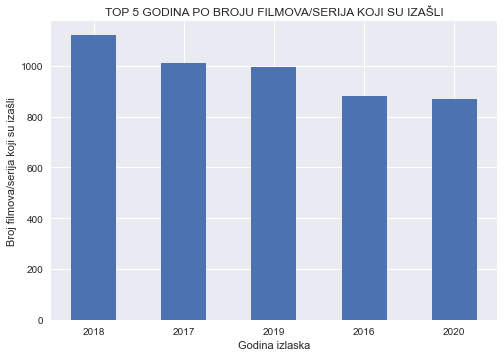

In [308]:
#bar chart
##kreiramo figuru i os
fig,ax=plt.subplots()

##biramo broj n podataka koje želimo pokazati prikazati
n=5

##generiramo nasumični broj podataka koji ćemo onda prikazati
podaci=godina_izlaska[:n]

##namještamo kako će nam xticks izgledati
x=np.arange(n)
##širina stupaca
width = 0.5

##radimo bar chart
p=podaci['release_year']
d=podaci['show_id']

ax.bar(x,d,width)

##postavljamo naslov grafa i uređujemo labele i ticks
ax.set_title('TOP 5 GODINA PO BROJU FILMOVA/SERIJA KOJI SU IZAŠLI')
ax.set_ylabel('Broj filmova/serija koji su izašli')
ax.set_xlabel('Godina izlaska')
ax.set_xticks(x)
ax.set_xticklabels(p.values)


OPIS GRAFA

Možemo vidjeti da je najviše serija+filmova izbačeno 2018. godine, dok 2019. i 2020. su dosta niže na grafu. Za 2020. možemo reći da je utjecaj imala i korona pa je stoga možda manji broj u odnosu na ranije godine. Iako za 2019. to baš ne možemo reći.

Sada crtamo grafove za odvojen ukupan broj izašlih serija i filmova po godinama

In [309]:
##uređujemo podatke koji će nam trebati za lakše crtanje grafa
##odvajamo filmove i serije
filmovi=data[data['type']=='Movie']
serije=data[data['type']=='TV Show']

In [310]:
##grupiramo podatke prema redateljima kako bismo dobili koliko je svaki od njih ukupno napravio serija i filmova
filmovi=filmovi.groupby('release_year').size().reset_index(name='count').sort_values('release_year',ascending=False)
serije=serije.groupby('release_year').size().reset_index(name='count').sort_values('release_year',ascending=False)

#serije
filmovi

,release_year,count
71,2021,12
70,2020,411
69,2019,582
68,2018,734
67,2017,744
...,...,...
4,1946,1
3,1945,3
2,1944,3
1,1943,3


In [311]:
mn(filmovi['release_year'], serije['release_year'])

##za razlike podskupova FILMOVI I SERIJE izasle --> RAZLIKE SU STATISTICKI ZNACAJNE --> jer je pvalue 0.00% ,tj. jako mala

MannwhitneyuResult(statistic=1180.5, pvalue=0.004380955376995867)

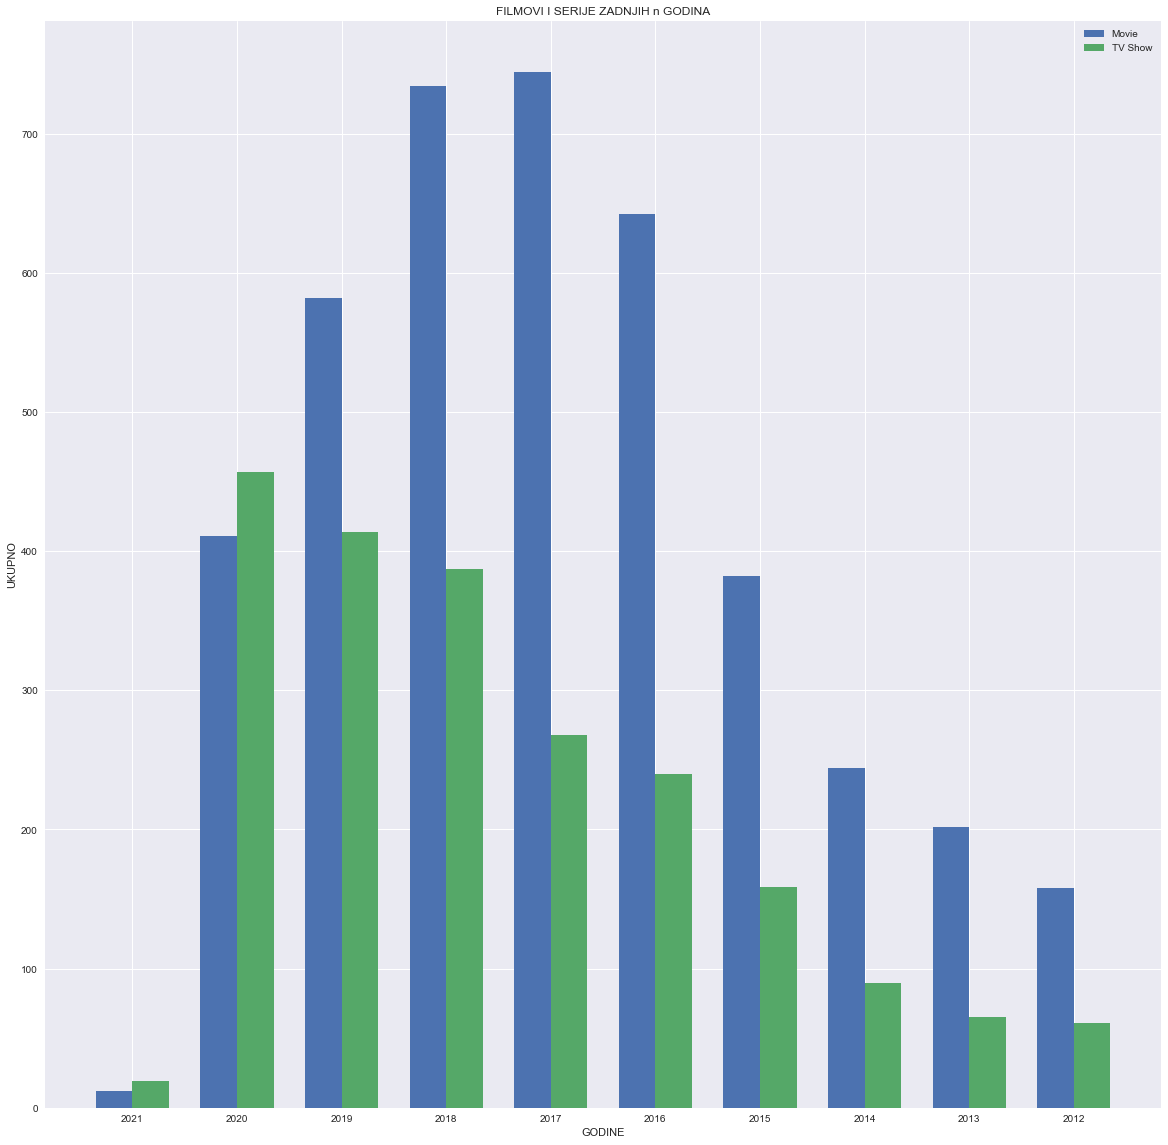

In [312]:
##koristimo axes kako bi na istom okviru crtali dva grafa jedan do drugoga 
fig, ax = plt.subplots(figsize=(20,20))
n=10

label=filmovi['release_year'][:n]
##serije['release_year'][:n]

x=filmovi['count'][:n]
y=serije['count'][:n]
##namještamo kako će nam xticks izgledati
t=np.arange(n)
##širina stupaca
width = 0.35

##radimo bar chart

ax.bar(t - width/2,x,width,label='Movie')
ax.bar(t + width/2,y,width,label='TV Show')

##postavljamo naslov grafa
ax.set_title('FILMOVI I SERIJE ZADNJIH n GODINA')
ax.set_ylabel('UKUPNO')
ax.set_xlabel('GODINE')
ax.set_xticks(t)
ax.set_xticklabels(label)
ax.legend(['Movie','TV Show'])


OPIS GRAFA

U ovom stupičastom grafu možemo vidjeti usporedbu broja filmova i serija u zadnjih n godina, u ovom slučaju mi smo izabrale da n bude zadnjih 10 godina. Iz grafa možemo vidjeti kako su filmovi predvladavali sve do 2020./2021. kada su serije skinule filmove sa dugogodišnjeg trona.

TREĆI GRAF

Dalje smo željele prikazati odnos filmova i serija uz pomoć boxplota koji je i dio same EDA-e. Za lakše crtanje boxplota koristile smo seaborn biblioteku.

(2000.0, 2021.0)

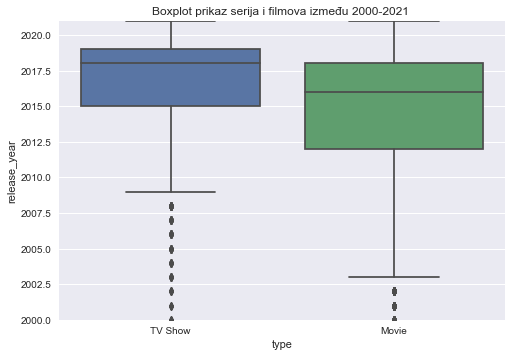

In [313]:
##crtanje boxplota
##podaci su nam cijela data tablica
##Za x vrijednost uzimamo tip, jeli se radi o seriji ili filmu, dok za y uzimamo godinu izlaska
sea.boxplot(x='type', y='release_year', data=data)
sea.despine(left=True)

##uređujemo izgled grafa
plt.title('Boxplot prikaz serija i filmova između 2000-2021 ')
plt.ylim(2000,2021)

OPIS GRAFA

Boxplot nam pokazuje kako distribucija serija sve više kroz godine raste, što samo potvrđuje prethodni graf gdje su serije po broju počele nadmašivati  godišnji broj filmova. Stoga možemo izvuči i mali zaključak da su ljudi počeli sve više gledati serije, pogotovo otkada je Netflix izašao, te je i to pridonjelo tom rastu.

ČETVRTI GRAF

Za sljedeći graf smo htjele prikazati i krivulju rasta filmova i serija kroz zadnje desetljeće. Za crtanje grafa koristimo opet seaborn biblioteku.

In [314]:
##čistimo podatke koje ćemo koristiti
podaci = data[['type', 'release_year']]

##grupiramo podatke po godinama i po tipu, jesu li film ili serija.
podaci=podaci.groupby(['release_year','type']).size().reset_index(name='count')

##sortiramo podatke
podaci=podaci.sort_values('release_year',ascending=False)

##biramo podatke zadnjeg desetljeća
pod=podaci
podaci=podaci[2:24]
##prikaz tablice
podaci

,release_year,type,count
115,2020,TV Show,457
114,2020,Movie,411
113,2019,TV Show,414
112,2019,Movie,582
111,2018,TV Show,387
110,2018,Movie,734
109,2017,TV Show,268
108,2017,Movie,744
107,2016,TV Show,240
106,2016,Movie,642


In [315]:
x=podaci['release_year']
y=podaci['count']

mn(x, y), test(x, y)

##za podatke za prikazivanje krivulje rasta filmova i serija kroz zadnje desetljeće RAZLIKE SU STATISTICKI ZNACAJNE jer je vjerojatnost 0.00% 

(MannwhitneyuResult(statistic=0.0, pvalue=7.1050490144100286e-09),
 Ttest_indResult(statistic=35.91883353556793, pvalue=3.688920691726439e-33))

Text(0.5, 1.0, 'RAST FILMOVA I SERIJA KROZ ZADNJE DESETLJEČE')

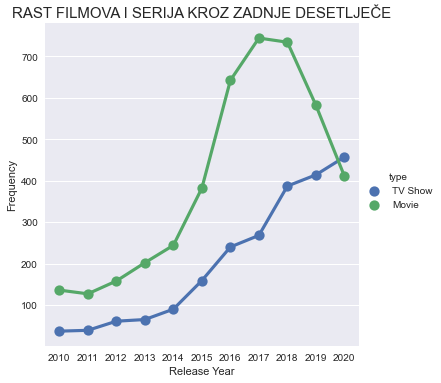

In [316]:
##crtanje grafa
sea.catplot(x = 'release_year', y = 'count', hue = 'type', data = podaci, kind = 'point')

##uređivanje grafa
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('RAST FILMOVA I SERIJA KROZ ZADNJE DESETLJEČE', size=15)

OPIS GRAFA

Iz grafa možemo vidjeti kako kroz desetljeće broj filmova eksponencijalno raste, no onda negdje 2018. počinje opadati, dok broj serija kroz desetljeće stalno ima lagan porast i 2020. napokon prelazi broj filmova.

PETI GRAF

Sljedeći graf je opet stupičasti, ali se ovaj put radi o top 5 redatelja koji su režirali najviše filmova i serija. A onda ćemo opet odvojiti filmove od serija i vidjeti koji su to redatelji najpopularniji u režiranju filmova, a koji serija.

In [317]:
##top 5 redatelja po broju filmova/serija
##uređujemo podatke koji će nam trebati za lakše crtanje grafa
podaci=data[['title','director']]

##odbacujemo redatelje koji su unknown jer nas zanimaju samo oni čija imena znamo
podaci = podaci.drop(podaci[podaci.director == 'unknown'].index)

##grupiramo podatke prema redateljima kako bismo dobili koliko je svaki od njih ukupno napravio serija i filmova,te ih sortiramo
podaci=podaci.groupby('director').count().reset_index().sort_values('title',ascending=False)
    
podaci
    

,director,title
3078,"Raúl Campos, Jan Suter",18
2321,Marcus Raboy,16
1607,Jay Karas,14
624,Cathy Garcia-Molina,13
2388,Martin Scorsese,12
...,...,...
1806,"Jon Hurwitz, Hayden Schlossberg",1
1807,Jon Izen,1
1808,Jon J. Whelan,1
461,"Benjamin Cohen, Nicolas Cotto",1


Text(0.5, 1.0, 'TOP 5 REDATELJA PO BROJU FILMOVA/SERIJA')

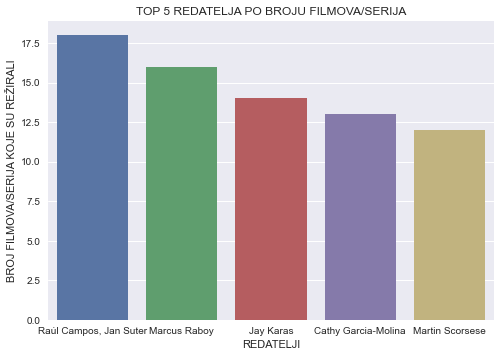

In [318]:
##pomocu seaborna crtamo graf
n=5
sea.barplot(x = podaci['director'][:n], y = podaci['title'][:n])

##uredujemo graf
plt.xlabel('REDATELJI')
plt.ylabel('BROJ FILMOVA/SERIJA KOJE SU REŽIRALI')
plt.title('TOP 5 REDATELJA PO BROJU FILMOVA/SERIJA')

OPIS GRAFA

Iz grafa možemo vidjeti imena redatelja koji su najpopularniji.


In [319]:
## sada radimo isto kao u prethodnom grafu samo ćemo odvojiti filmove i serije i reći top n redatelja
##uređujemo podatke koji će nam trebati za lakše crtanje grafa
podaci=data[['type','director']]

##odbacujemo redatelje koji su unknown jer nas zanimaju samo oni čija imena znamo
podaci = podaci.drop(podaci[podaci.director == 'unknown'].index)

##grupiramo podatke prema redateljima kako bismo dobili koliko je svaki od njih ukupno napravio serija i filmova
podaci=podaci.groupby(['director','type']).size().reset_index(name='count').sort_values('count',ascending=False)

##odvajamo filmove i serije
filmovi=podaci[podaci['type']=='Movie']
serije=podaci[podaci['type']=='TV Show']
#serije
#filmovi

Text(0.5, 1.0, 'TOP 10 REDATELJA PO BROJU SERIJA')

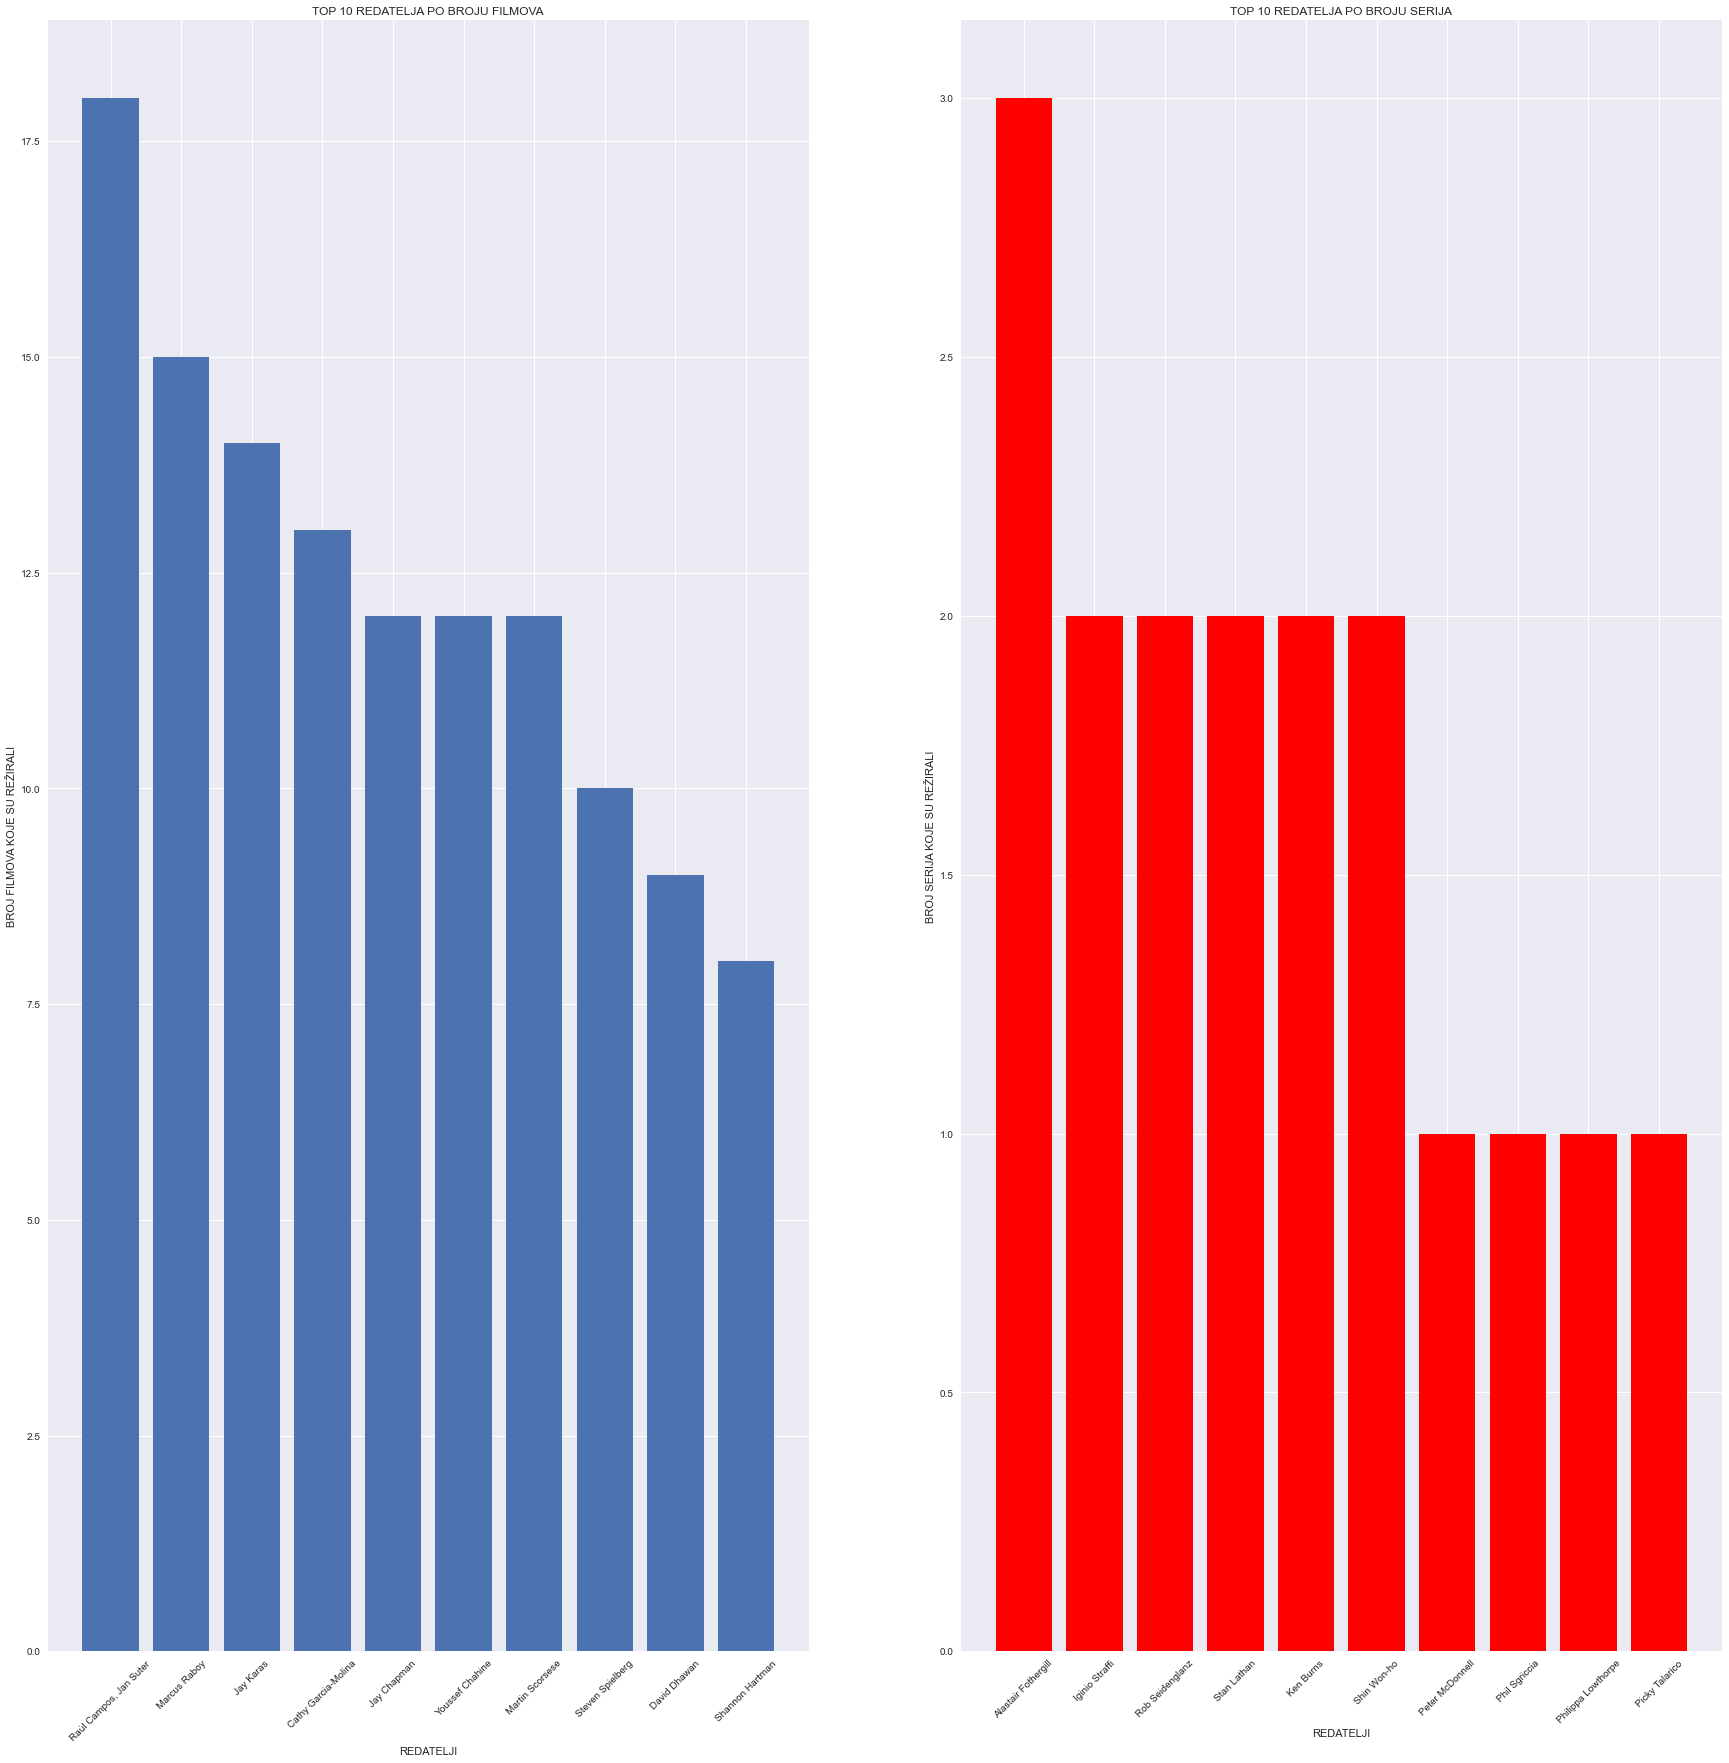

In [320]:
##radimo grafove za top n redatelja filmova i serija
##koristimo axes kako bi na istom okviru crtali dva grafa jedan do drugoga 
fig, axes = plt.subplots(1,2,figsize=(30,30))

ax1 = axes[0]
ax2 = axes[1]
n=10


# sada crtamo na svakoj osi graf koji želimo
ax1.bar(filmovi['director'][:n], filmovi['count'][:n])
ax2.bar(serije['director'][:n], serije['count'][:n],color='red')

##uređujemo labele s imenima redatelja da bismo ih lakše mogli pročitati
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

##uređujemo ostatk grafa
ax1.set_xlabel('REDATELJI')
ax2.set_xlabel('REDATELJI')
ax1.set_ylabel('BROJ FILMOVA KOJE SU REŽIRALI')
ax2.set_ylabel('BROJ SERIJA KOJE SU REŽIRALI')
ax1.set_title('TOP 10 REDATELJA PO BROJU FILMOVA')
ax2.set_title('TOP 10 REDATELJA PO BROJU SERIJA')

In [321]:
mn(filmovi['count'],serije['count'])

##za gledanje razlike podskupova redatelja FILMOVA i SERIJA možemo vidjeti da je p.value oko 0.01% pa možemo reći da su RAZLIKE STATISTIČKI ZNAČAJNE

MannwhitneyuResult(statistic=294396.5, pvalue=1.897693181723258e-07)

OPIS GRAFA

Ovdje smo samo išli malo dublje u naše podatke i uredili ih tako da s lijeve možemo vidjeti najpopularnije redatelje kada su u pitanju filmovi, a s desne strane najpopularnije redatelje kada su u pitanju serije.

ŠESTI GRAF

Sljedeći graf ćemo iskoristiti za prikazati koje su predvladavajuće duljine filmova i serija. Duljina filmova je izražena u minutama, dok je duljina serija izražena u sezonama.

In [322]:
##Prvo gledamo kako nam izgledaju podaci za filmove/serije po pitanju duljine
#data[data['type']=='TV Show']
data[data['type']=='Movie']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,unknown,Nasty C,International,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


In [323]:
##čistimo stupac duljina trajanja kako bi lakše razumjeli podatke koji pišu
##jer su npr sezone serija pisane u broj + sezona , a filmove isto izražavamo u minutama stoga nema potrebe za decimalnim brojevima
data['duration'] = data['duration'].apply(lambda x: x.split(' ')).str[0]
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,unknown,Nasty C,International,"September 25, 2020",2019,TV-MA,44,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [324]:
##radimo varijable kako bi odvojili filmove i serije
film = data[data['type'] == 'Movie']
serija = data[data['type'] == 'TV Show']
#serija
#film

Text(0.5, 1.0, 'BROJ FILMOVA PO DULJINI TRAJANJA')

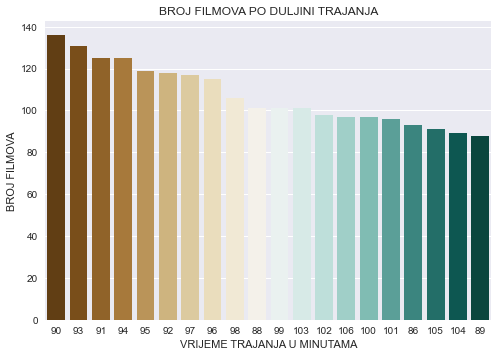

In [325]:
##sada prvo crtamo graf za duljinu filmova
n=20
duljina_filmova= film.groupby('duration').count().reset_index().sort_values(ascending=False,by='type')[0:n]
duljina_filmova

##crtamo barplot koristeći seaborn
sea.barplot(data = duljina_filmova, x='duration', y='show_id', order=duljina_filmova['duration'], palette='BrBG')
sea.despine(left=True)

##uređujemo graf
plt.ylabel('BROJ FILMOVA')
plt.xlabel('VRIJEME TRAJANJA U MINUTAMA')
plt.title('BROJ FILMOVA PO DULJINI TRAJANJA')

In [326]:
duljina_filmova['duration']=duljina_filmova['duration'].astype('int')
normal(duljina_filmova['duration'])

## p.value je 32%, što znači da razlika nije statistički značajna, odnosno da je razdioba normalna

NormaltestResult(statistic=2.2736905368694442, pvalue=0.32082955812690334)

OPIS GRAFA

Možemo vidjeti da najviše filmova traju 90 minuta, nešto manje njih traje između 91-95. Oni koji traju duže od 100 su dosta niže na grafu.



Text(0.5, 1.0, 'BROJ SERIJA PO BROJU SEZONA')

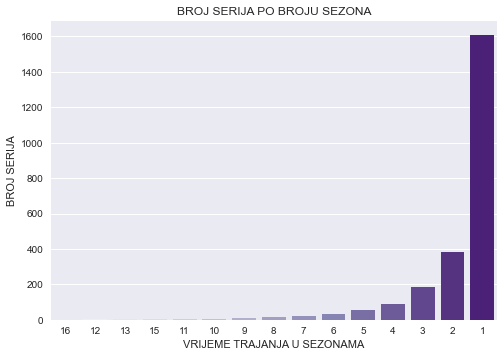

In [327]:
##sada crtamo graf za duljinu serija
duljina_serija= serija.groupby('duration').count().reset_index().sort_values(ascending=True,by='type')

##crtamo barplot koristeći seaborn
sea.barplot(data = duljina_serija, x='duration', y='show_id', order=duljina_serija['duration'], palette='Purples')
sea.despine(left=True)

##uređujemo graf
plt.ylabel('BROJ SERIJA')
plt.xlabel('VRIJEME TRAJANJA U SEZONAMA')
plt.title('BROJ SERIJA PO BROJU SEZONA')

Za duljinu serija broj podataka je n<20 pa nije baš zgodno raditi testove za statističku značajnost

OPIS GRAFA

U slučaju serija možeo vidjeti da najviše ima onih koje su imale samo 1 sezonu, i onda dolazi do velikog pada u broju serija što se sezone povečavaju. Rijetko koja serija ima više od 9 sezona.

SEDMI GRAF

Nadalje prvi put radimo scatter plot pomoću seaborn biblioteke. Njega ćemo koristiti za prikaz u kakvom su odnosu godina izlaska serije/filma sa duljinom njihova trajanja.

In [328]:
podaci_film=film.groupby(['release_year','duration']).size().reset_index(name='count').sort_values('duration',ascending=False)
podaci_serija= serija.groupby(['release_year','duration']).size().reset_index(name='count')
podaci_film

,release_year,duration,count
429,2001,99,1
1654,2018,99,17
734,2008,99,2
1405,2016,99,15
1185,2014,99,6
...,...,...,...
97,1979,100,1
1292,2016,100,11
935,2012,100,4
1781,2020,100,7


Text(0.5, 1.0, 'DISTRIBUCIJA DULJINE SERIJA I FILMOVA')

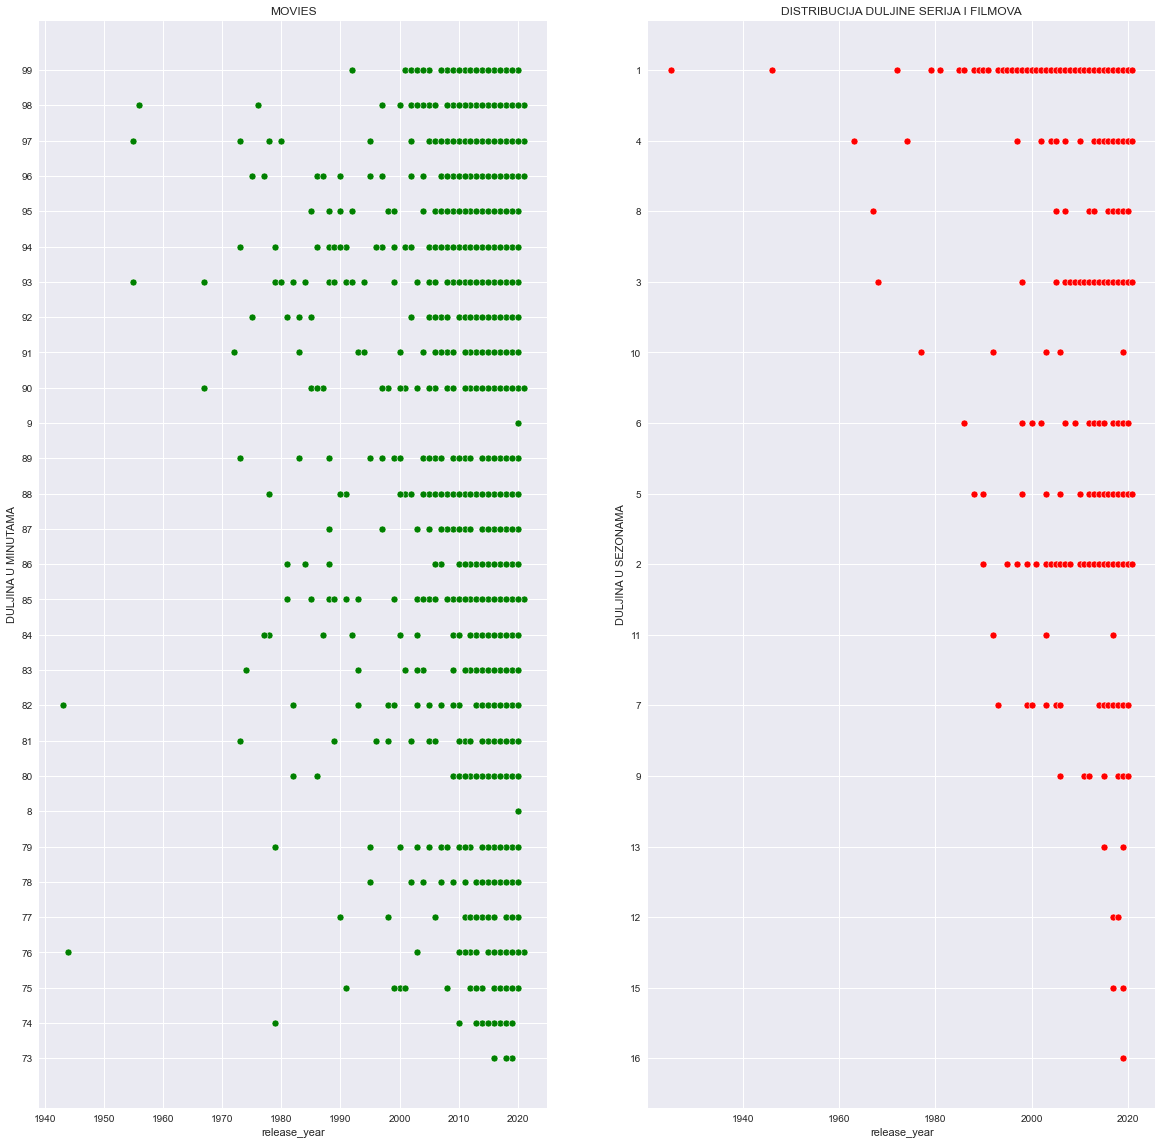

In [329]:
fig, ax =plt.subplots(nrows= 1, ncols = 2, figsize=(20,20))

graf_filmovi = sea.scatterplot(x='release_year', y='duration', data=podaci_film[:500], ax=ax[0], color= 'green')
graf_serija = sea.scatterplot(x='release_year', y='duration', data=podaci_serija, ax=ax[1], color='red')
sea.despine(left=True)

graf_filmovi.set_ylabel('DULJINA U MINUTAMA')
graf_serija.set_ylabel('DULJINA U SEZONAMA')

graf_filmovi.set_title('MOVIES')
graf_serija.set_title('TV SHOWS')
plt.title('DISTRIBUCIJA DULJINE SERIJA I FILMOVA')

In [330]:
podaci_film=podaci_film.astype('int')
podaci_serija=podaci_serija.astype('int')
test(podaci_film,podaci_serija),mn(podaci_film,podaci_serija)
##Razlike među podskupovima podataka SU STATISTICKI ZNAČAJNE jer je p.value 0.00% što dovodi do tog zaključka

(Ttest_indResult(statistic=array([  0.45404329,  34.45788245, -11.27096663]), pvalue=array([6.49844971e-001, 2.67772730e-206, 1.20963074e-028])),
 MannwhitneyuResult(statistic=-3757505.5, pvalue=0.0))

OPIS GRAFA

Kod grafa vezanog za serije možemo vidjeti da što godine izlaska prelaze iz desetljeća u desetljeće raste i sam broj sezona koje neka serija ima. Između 2010.-2020. se taj broj najviše povečao.

Kod grafa za filmove možemo vidjeti kako se kroz desetljeća duljina filmova mijenja, te minutaže koje najviše predvladavaju su one od 82-97 minuta.

OSMI GRAF

Za sada smo riješili redatelje, broj filmova i serija te njihove duljine trajanja i godine izlaska.
Ostaju nam jos žanrovi, rating, te zemlja porijekla za vizualno prikazati zanimljive stavke.

Idemo od ostatka krenuti sa žanrovima. Napraviti ćemo graf koji će pokazivati dva najviše korištena žanra svake godine u periodu od 2010.-2019. godine. Prije samog crtanja moramo urediti podatke koje ćemo koristiti. S obzirom da stupac 'listed_in' sadrži i podžanrove koje neki film ili serija mogu imati, mi ćemo podatke urediti na način da ćemo odvajati žanrove i za svaki nadovezati godinu izlaska.

In [331]:
##Čistimo podatke.
##prvo kreiramo listu u koju ćemo spremati vrijednosti godine izlaska, te sam naziv zanra
lista = list()

##pomoću for petlje idemo po elementima naših podataka
##odvajamo godine izlaska elementa, te za zanr u 'listed_in' spremamo u listu podatak godine i zanra
for ind, element in data.iterrows():
    godina_izlaska = element['release_year']
    for zanr in str(element['listed_in']).split(','):
        lista.append([godina_izlaska, zanr])
        
##novi dataframe sa podacima koje čemo dalje koristit        
genre = pd.DataFrame(lista, columns= ['godina_izlaska', 'zanr'])
genre

,godina_izlaska,zanr
0,2020,International TV Shows
1,2020,TV Dramas
2,2020,TV Sci-Fi & Fantasy
3,2016,Dramas
4,2016,International Movies
...,...,...
17066,2019,Music & Musicals
17067,2019,International TV Shows
17068,2019,Reality TV
17069,2019,Documentaries


In [332]:
##grupiramo podatke po godinama i po tipu, jesu li film ili serija.
podaci = genre.groupby(['godina_izlaska', 'zanr']).size().reset_index(name='count')

##sortiramo podatke
podaci=podaci.sort_values('godina_izlaska',ascending=False)

##prikaz tablice
podaci[:30]

,godina_izlaska,zanr,count
1494,2021,TV Action & Adventure,2
1479,2021,TV Thrillers,1
1465,2021,Crime TV Shows,1
1466,2021,Docuseries,2
1467,2021,Dramas,1
1468,2021,International Movies,5
1469,2021,International TV Shows,2
1470,2021,LGBTQ Movies,1
1471,2021,Music & Musicals,1
1472,2021,Reality TV,2


In [333]:
##sada ćemo odvojiti dva top žanra svake godine
godine = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]
n=2
lista = list()
for godina in godine:
    for i in range(n):
        temp1 = podaci[podaci['godina_izlaska'] == godina].iloc[i,:]
        lista.append(list(temp1))

    
top_podaci = pd.DataFrame(lista, columns=('godine', 'zanrovi', 'count'))
top_podaci

,godine,zanrovi,count
0,2019,Sports Movies,24
1,2019,Romantic Movies,59
2,2018,LGBTQ Movies,12
3,2018,Sports Movies,27
4,2017,TV Sci-Fi & Fantasy,4
5,2017,TV Mysteries,10
6,2016,Reality TV,14
7,2016,Romantic Movies,41
8,2015,Spanish-Language TV Shows,8
9,2015,Reality TV,9


Text(0.5, 1.0, 'Top 2 ŽANRA SVAKE GODINE U ZADNJIH 10 GODINA ')

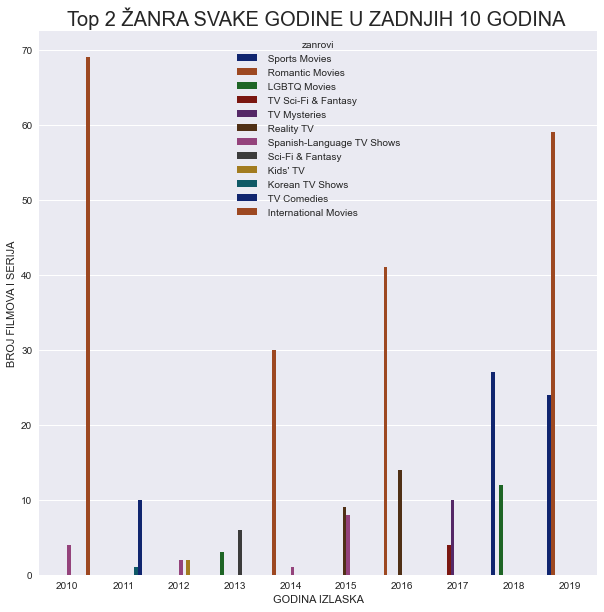

In [334]:
bar, ax = plt.subplots(figsize=(10,10))
##namještamo kako će nam xticks izgledati
t=np.arange(len(godine))
sea.barplot(data = top_podaci,x = 'godine', y ='count', hue='zanrovi', palette = 'dark')

plt.xlabel('GODINA IZLASKA')
plt.ylabel('BROJ FILMOVA I SERIJA')
plt.title('Top 2 ŽANRA SVAKE GODINE U ZADNJIH 10 GODINA ', size=20)

OPIS GRAFA

Kroz desetljeće možemo vidjeti kako se kroz godine mijenja interes za žanrove, ali interes za romantične filmove nikako ne jenjava. 

DEVETI GRAF

Napraviti ćemo i tortni prikaz trideset najpopularnijih žanrova na netflixu kako bi bolje vidjeli koji to zanrovi predvladavaju.

In [335]:
##grupiramo podatke po godinama i po tipu, jesu li film ili serija.

##Čistimo podatke.
##prvo kreiramo listu u koju ćemo spremati vrijednosti godine izlaska, te sam naziv zanra
lista = list()

##pomoću for petlje idemo po elementima naših podataka
##odvajamo godine izlaska elementa, te za zanr u 'listed_in' spremamo u listu podatak godine i zanra
for ind, element in data.iterrows():
    godina_izlaska = element['release_year']
    for zanr in str(element['listed_in']).split(','):
        zanr=zanr.replace(' ', "")
        lista.append([godina_izlaska, zanr])
        
##novi dataframe sa podacima koje čemo dalje koristit        
podatak = pd.DataFrame(lista, columns= ['godina_izlaska', 'zanr'])
podatak

podatak = podatak.groupby('zanr').count().reset_index().sort_values('godina_izlaska',ascending=False)
podatak




,zanr,godina_izlaska
16,InternationalMovies,2437
12,Dramas,2106
7,Comedies,1471
17,InternationalTVShows,1199
10,Documentaries,786
0,Action&Adventure,721
34,TVDramas,704
15,IndependentMovies,673
4,Children&FamilyMovies,532
24,RomanticMovies,531


(array([], dtype=float64), [])

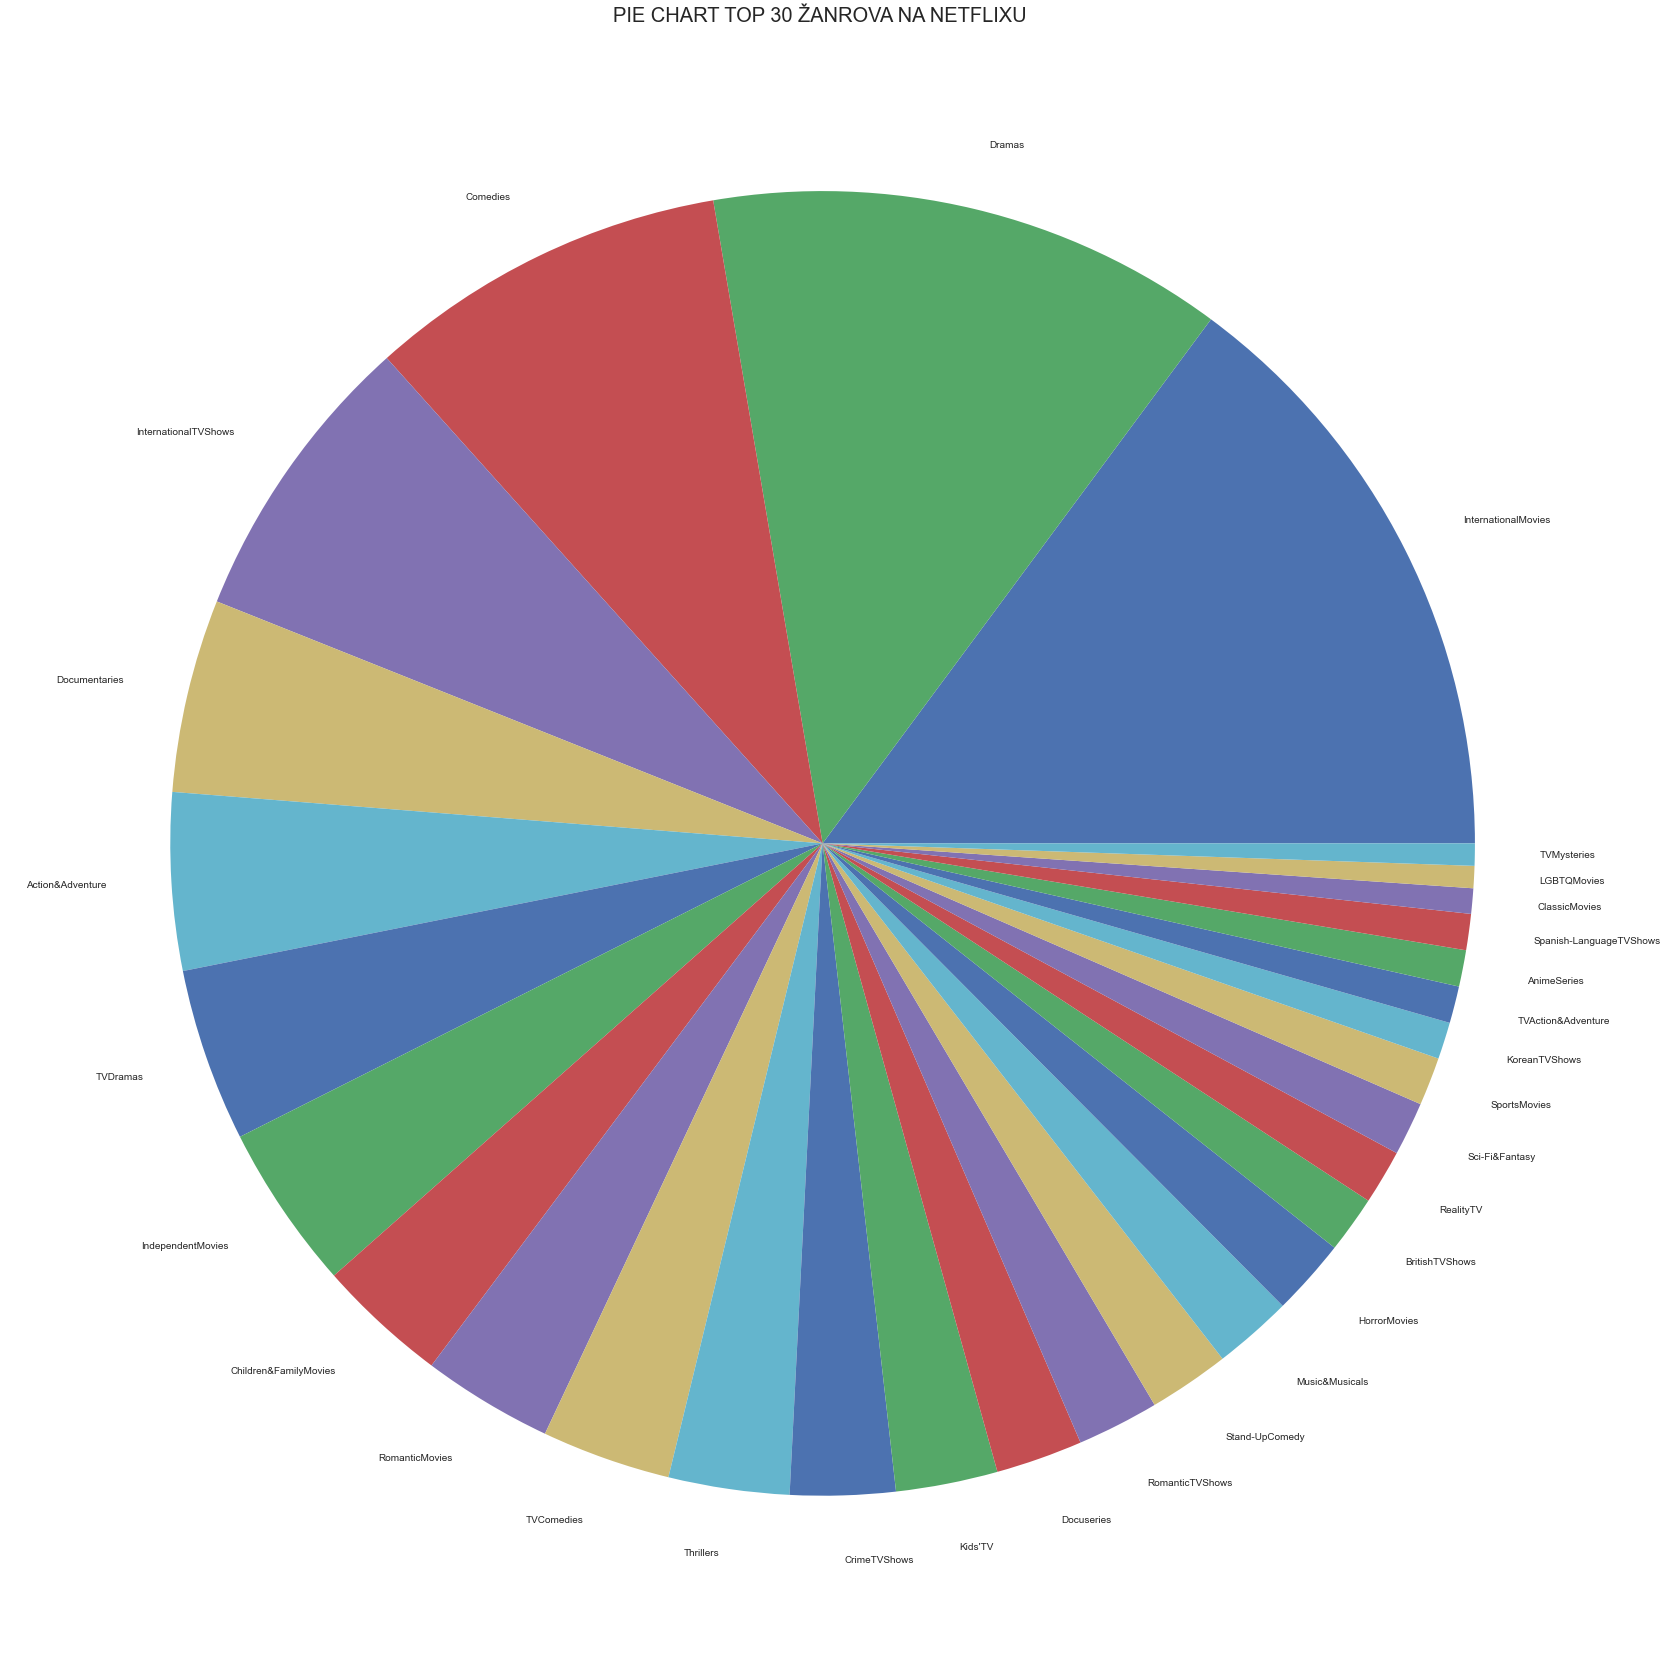

In [336]:
fig, ax = plt.subplots(figsize=(30,30))
##namještamo kako će nam xticks izgledati
t=np.arange(30)
ax.pie(labels=podatak['zanr'][:30],x=podatak['godina_izlaska'][:30])

plt.title('PIE CHART TOP 30 ŽANROVA NA NETFLIXU ', size=20)
plt.xticks(rotation=90)
##plt.legend(loc='upper right')

OPIS GRAFA

Iz grafa možemo vidjeti kako najviše predvladavaju žanrovi international movies, drama, comedy. Dok najmanje imamo tv mistery, LQBTQ i klasičnih žanrova.

DESETI GRAF

Sada kada smo gotovi sa žanrovima idemo na sljedeći stupac interesa, a to je rating filmova i serija. Za izradu grafa koristit ćemo plotly biblioteku.

In [337]:
kategorije = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

data['target_ages'] = data['rating'].replace(kategorije)

# target_ages is another category (4 classes)
data['target_ages'] = pd.Categorical(data['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens
7784,s7785,Movie,Zulu Man in Japan,unknown,Nasty C,International,"September 25, 2020",2019,TV-MA,44,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults
7785,s7786,TV Show,Zumbo's Just Desserts,unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids


In [338]:
##grupiramo podatke po kategorijama i po ciljanim dobnim skupinama
podaci = data.groupby(['rating', 'target_ages']).size().reset_index(name='count')

##micemo nule
podaci=podaci[podaci['count']!=0]
##sortiramo podatke
podaci=podaci.sort_values('count',ascending=False)

##prikaz tablice
podaci

,rating,target_ages,count
35,TV-MA,Adults,2863
26,TV-14,Teens,1933
37,TV-PG,Older Kids,806
23,R,Adults,665
18,PG-13,Teens,391
40,TV-Y,Kids,280
45,TV-Y7,Older Kids,271
13,PG,Older Kids,247
28,TV-G,Kids,194
11,NR,Adults,84


In [339]:
fig=ex.bar(podaci, x='rating', y='count', color='target_ages')
fig.update_layout(title='KATEGORIJE FILMOVA I SERIJA')
fig.show()

S obzirom da broj ratinga je manji od 20 nema smisla raditi testove za statističku značajnost.

OPIS GRAF

Kod ratinga za djecu najviše ima TV-Y kategorije što znači da je prikladno za svu djecu. Kod starije djece predvladava TV-PG što a to su oni sadržaji za koje roditelji moraju odlučiti smiju li njihova djeca to gledati. Kod tinejdžera predvladava TV-14 što znači da ti sadržaji nisu prikladni za djecu mlađu od 14 godina stoga je isto snažan utjecaj roditelja na to hoće li ovaj sadržaj gledati njihova djeca. Kod odraslih predvladava TV-MA rating, što znači da je ovaj sadržaj prikladan samo za zrele osobe i one starije od 18.

JEDANAESTI GRAF

Sada prelazimo na stupac 'country'. Tu ćemo gledati top 10 zemalja po produkciji filmova i serija. Za izradu grafova koristit ćemo plotly i seaborn biblioteke. Prvo moramo očistiti podatke jer u nekim retcima imamo više zemalja stoga ćemo gledati samo prvu spomenutu.

In [340]:
zemlje_lista = list()

for ind, element in data.iterrows():
    tip = element['type']
    for x in str(element['country']).split(','):
        x=x.replace(' ', "")
        zemlje_lista.append([tip, x])

zemlje = pd.DataFrame(zemlje_lista, columns= ['type', 'country'])

zemlje1 =zemlje.groupby('country').size().reset_index(name='count').sort_values('count',ascending=False)

zemlje2=zemlje.groupby(['country','type']).size().reset_index(name='count').sort_values('count',ascending=False)


serije =zemlje2[zemlje2['type']=='TV Show'] 
filmovi =zemlje2[zemlje2['type']=='Movie']


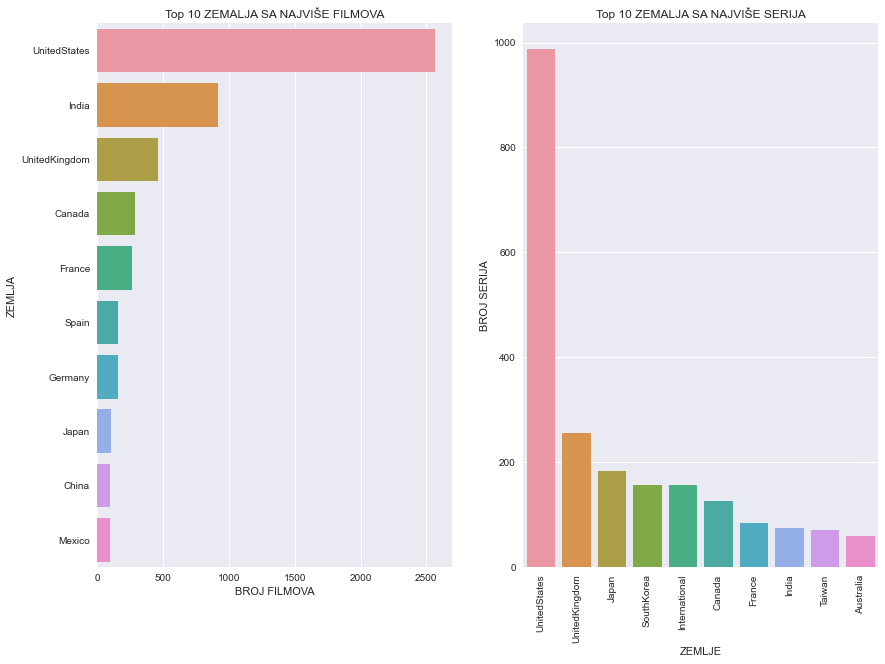

In [341]:
bar, ax = plt.subplots(1,2, figsize=(14,10))
ax1=ax[0]
ax2=ax[1]

sea.barplot(x = 'count', y ='country', data = filmovi[:10], ax = ax1)
ax1.set_xlabel('BROJ FILMOVA')
ax1.set_ylabel('ZEMLJA')
ax1.set_title('Top 10 ZEMALJA SA NAJVIŠE FILMOVA')

sea.barplot(x = 'country', y = 'count', data = serije[:10], ax = ax2)
ax2.set_xlabel('ZEMLJE')
ax2.set_ylabel('BROJ SERIJA')
ax2.set_title('Top 10 ZEMALJA SA NAJVIŠE SERIJA')
ax2.tick_params(axis='x', rotation=90)

In [342]:
##tortni prikaz zemalja izlaska serija/filmova pomoću plotly biblioteke
zemlje_sve=zemlje.groupby('country').size().reset_index(name='count').sort_values('count',ascending=False)

fig = ex.pie(zemlje_sve[:50], values='count',names='country')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [343]:
normal(filmovi['count']),normal(serije['count'])
##s obziromda je p.value jako mala možemo zaključiti da su razlike statistički značajne , te da se ne radi o normalnoj razdiobi

(NormaltestResult(statistic=213.99131096352414, pvalue=3.407040033436605e-47),
 NormaltestResult(statistic=126.1988669783576, pvalue=3.9469736261305775e-28))

OPIS GRAF

Najviše sadržaja proizvode USA, Indija i UK, a najmanje europske zemlje.

ZAKLJUČAK

U ovom seminarskom radu napravljenom pomoću jupyter notebook-a analizirali smo podatke vezane za filmove i serije koji se nalaze na aplikaciji NETFLIX. Prvo smo ih očistili i pripremili za lakši rad s njima, a onda smo crtali razne grafove kako bi vizualizirali podatke koji su nas zanimali. Za crtanje grafova koristili smo tri biblioteke: matplotlib, seaborn i plotly. Za samo učitavanje podataka i njihovo čišćenje smo koristili pandas i numpy. Vizualno smo prikazali koliko ima filmova u odnosu na serije, koji su redatelji najpopularniji u kojoj branši. Gledali smo koji žanrovi filmova i serija dominiraju, kolika je opčenito duljina trajanja samog filma ili serije i koji rating filma/serije se najviše koristi. Isto tako prikazali smo koje zemlje prednjače u proizvodnji filmova/serija, a koje su dosta nisko na ljestvici. Još smo prikazali kako se broj filmova i serija mijenjao kroz godine izlaska.

Isto tako proveli smo nad podskupovima podataka testove kako bismo vidjeli kakva je statistička značajnosti između razlika podskupova.

                                                                                        JELENA MALJKOVIĆ, MARINA AGLIĆ ČUVIĆ